In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
df=pd.read_csv("train.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

## Exploratory Data Analysis(EDA)

In [ ]:
df.isna().sum()

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=df, palette='RdBu_r')

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df, palette='rainbow')

In [3]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

NameError: name 'df' is not defined

In [ ]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [ ]:
sns.countplot(x='SibSp',data=df)

In [ ]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Data cleaning

we want to fill the missing age data instead of dropping it.

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df, palette='winter')

In [ ]:
def impute_age(cols):
    Age= cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
df['Embarked'].isna().sum()

In [ ]:
df.drop('Cabin', axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop('Embarked', axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df2=df.copy()

In [ ]:
df2.head()

In [ ]:
df2.drop(labels=['Name','Ticket'], axis=1,inplace=True)

In [ ]:
df2

In [ ]:
df.head()

In [ ]:
df.dropna(inplace=True)

### Converting Categorical Features to Numericals

In [ ]:
df.info()

In [ ]:
df2.head()

In [ ]:
df2.drop(['Sex','Age'], axis=1, inplace=True)

In [ ]:
df2

In [ ]:
emb=pd.get_dummies(df['Sex']).head()
emb

In [ ]:
mb=pd.get_dummies(df['Sex'],drop_first=True).head()
mb

In [ ]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
sex.head()

In [ ]:
df.head()

In [ ]:
df.drop(['Sex','Name','Ticket'], axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop(['PassengerId'],axis=1, inplace=True)

In [ ]:
df.head()

### Building a Logistic Regression Model

### Train Test Split

In [ ]:
X=df.drop('Survived',axis=1)

In [ ]:
X.head()

In [ ]:
y=df['Survived']
y.head()

In [ ]:
X.shape,y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=101)

### Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,preds)

In [ ]:
accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,preds)

In [ ]:
accuracy

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


so Embarked having missing values it is the example of missing completely at random(MCAR)

2. MNAR (Missing data not at random)
   1. there is some relationship between the missing data and any other values,observed or missing, within the data set.
   example is (cabin)

In [6]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [8]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### types of handling missing values
1. mean/median/mode replacement
2. Random Sample imputation
3. capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. frequent categories imputation


#### mean /meadian/mode
when should we apply
mean/median/mode imputation has the assumption that the data is completely missing at random(MCAR).
we solve this by replacing NAN with the most frequent occurance of the variable.

In [9]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
### let us see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
def impute_nan(df,variable,median):
    df[variable+'median']=df[variable].fillna(median)

In [12]:
median=df.Age.median()
median

28.0

In [13]:
impute_nan(df,'Age',median)

In [14]:
df.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
print(df['Age'].std())
print(df['Agemedian'].std())

14.526497332334044
13.019696550973194


In [17]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

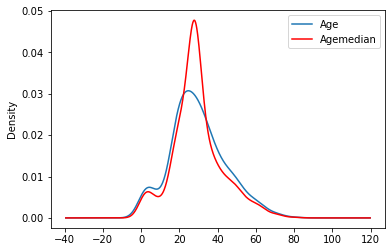

In [20]:
fig=plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax=ax)
df.Agemedian.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Random sample imputation
1. when we should use this? it assumes that the data is completely missing at random(MCAR)

In [21]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [22]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [26]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [29]:
def impute_nan(df,variable,median):
    df[variable+'median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [30]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Agemedian,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


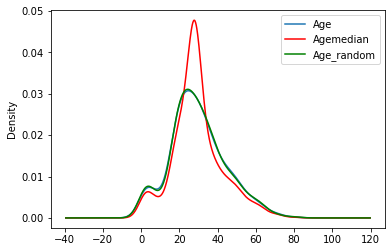

In [32]:
fig=plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax=ax)
df.Agemedian.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

capturing NAN values wuth new feature
1. when we should use? it assumes the data missing is not completely random(MNCR) 

In [34]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [35]:
df['age_nan']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [56]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [57]:
df.Age.median()

28.0

In [58]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df['Age'].fillna(df.Age.median(),inplace=True)

In [59]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### End of Distribution imputation

In [2]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

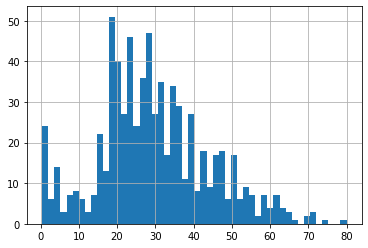

In [3]:
df.Age.hist(bins=50)

In [9]:
extreme=df.Age.mean()+3*df.Age.std()

In [6]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

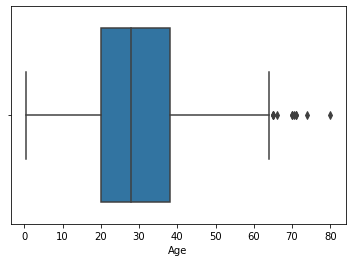

In [8]:
sns.boxplot('Age',data=df)

In [10]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [11]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [12]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

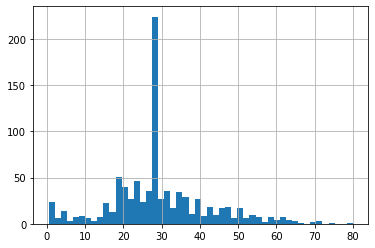

In [14]:
df["Age"].hist(bins=50)

<AxesSubplot:>

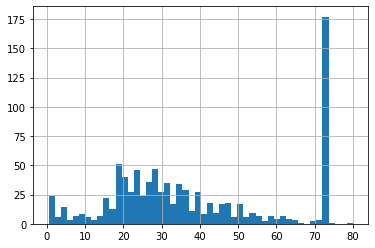

In [15]:
df["Age_end_distribution"].hist(bins=50)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

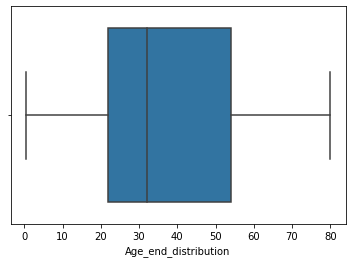

In [16]:
sns.boxplot('Age_end_distribution',data=df)

## Arbitrary value imputation
it consists of replacing NAN by an arbitrary value

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [9]:
impute_nan(df,'Age')

In [11]:
df.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


##### How to Handle Categorical Missing Values
##### Frequent Category Imputation

In [12]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [13]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [17]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

<AxesSubplot:>

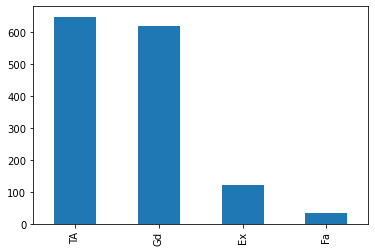

In [19]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

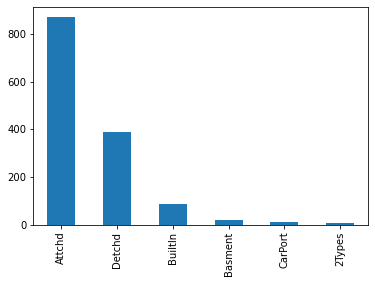

In [20]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

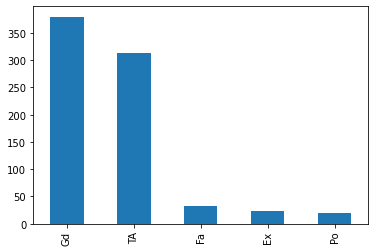

In [21]:
df['FireplaceQu'].value_counts().plot.bar()

In [22]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [23]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [24]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [26]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [27]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [30]:
df['GarageType'].mode()[0]

'Attchd'

##### Adding a variable to capture NAN

In [43]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [44]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [45]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [46]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [47]:
frequent=df['BsmtQual'].mode()[0]

In [48]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [49]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [50]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [51]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


##### suppose u have more frequent categories , we just place NAN with a new category

In [52]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [53]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
def impute_nan(df,variable):
    np.where(df[variable].fillna('missing',inplace=True))

In [58]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [61]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
